# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [15]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
import scipy.stats as st
from scipy.stats import linregress

# Import API key
from config import api_key

temp_units = "imperial"

#citipy to determine lat/long
from citipy import citipy

lat_range= (-90, 90)
long_range = (-180, 180)

url = "http://api.openweathermap.org/data/2.5/weather?"
query_url = f"{url}appid={api_key}&units={temp_units}&q="
output_data = "Output/city_data.csv"

## Generate Cities List

In [16]:
#empty list for holding lat/long and city names
lats_longs = []
city_names = []

#create random set of lat/longs
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
longs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lats_longs = zip(lats, longs)

#loop through lats_longs to find coordinates using citipy and add unique names to list
for coordinates in lats_longs:
    city_name = citipy.nearest_city(coordinates[0], coordinates[1]).city_name

    if city_name not in city_names:
        city_names.append(city_name)
    
city_count = len(city_names)
print(city_count)        

648


In [17]:
#weather_response_json = requests.get(query_url + city_name).json()
#print(json.dumps(weather_response_json, sort_keys=True, indent=2))

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [19]:
# Starting URL for Weather Map API Call
query_url = f"{url}appid={api_key}&units={temp_units}&q="

#create new lists for city data
lat = []
long = []
temp = []
temp_max = []
humidity = [] 
cloudy = []
windspeed = []
name = []
country = []
date = []
#set count for timer
#counter = 0
#maxattempts = 59
#set record counter starting with 1
processing_record = 1

# for loop to determine data for new lists with try/except    
for city in city_names:    
    try:
        response = requests.get(query_url + city).json()
        lat.append(response['coord']['lat'])
        long.append(response['coord']['lon'])
        temp.append(response['main']['temp'])
        temp_max.append(response['main']['temp_max'])
        humidity.append(response['main']['humidity'])
        cloudy.append(response['clouds']['all'])
        windspeed.append(response['wind']['speed'])
        name.append(response['name'])
        country.append(response['sys']['country'])
        date.append(response['dt'])
        print(f"City Count {processing_record} : {city}")
        #counter += 1        
        processing_record += 1
    except:
        #print log
        print("City not found! Skipping...")
        #pass
    #if counter == maxattempts:
        #time.sleep(60)
        #counter = 0

              
print(f"-----------------------")
print(f"Data Retrieval Complete")
print(f"-----------------------")

#print results
print(f"latitude: {lat} {len(lat)}")
print(f"longitude: {long} {len(long)}")
print(f"temperature: {temp} {len(temp)}")
print(f"temp_max: {temp_max} {len(temp_max)}")
print(f"humidity: {humidity} {len(humidity)}")
print(f"clouds: {cloudy} {len(cloudy)}")
print(f"wind speed: {windspeed} {len(windspeed)}")
print(f"date: {date} {len(date)}")
print(f"city name: {name} {len(name)}")

City Count 1 : los llanos de aridane
City Count 2 : tuktoyaktuk
City Count 3 : maguling
City Count 4 : hualmay
City not found! Skipping...
City Count 5 : jamestown
City Count 6 : kodiak
City Count 7 : arraial do cabo
City Count 8 : carnarvon
City Count 9 : hilo
City Count 10 : margate
City Count 11 : ueda
City Count 12 : cidreira
City Count 13 : njombe
City Count 14 : ryotsu
City Count 15 : gamba
City Count 16 : longyearbyen
City Count 17 : mahon
City Count 18 : varzea grande
City Count 19 : ambovombe
City not found! Skipping...
City Count 20 : lagoa
City Count 21 : east london
City Count 22 : kenai
City not found! Skipping...
City Count 23 : beringovskiy
City Count 24 : nanortalik
City Count 25 : codrington
City Count 26 : mataura
City Count 27 : minyar
City Count 28 : kloulklubed
City Count 29 : barrow
City Count 30 : mollendo
City Count 31 : georgetown
City not found! Skipping...
City Count 32 : broome
City Count 33 : ronne
City Count 34 : hami
City Count 35 : punta arenas
City Coun

City Count 281 : preili
City Count 282 : campo grande
City Count 283 : chardara
City Count 284 : hofn
City Count 285 : hambantota
City Count 286 : kitob
City Count 287 : blagoyevo
City Count 288 : novobelokatay
City Count 289 : awbari
City not found! Skipping...
City Count 290 : singaparna
City Count 291 : kaniama
City Count 292 : marawi
City Count 293 : znamenskoye
City Count 294 : thompson
City Count 295 : bansang
City Count 296 : la ronge
City Count 297 : sur
City Count 298 : beeville
City Count 299 : nemuro
City Count 300 : saquisili
City Count 301 : hargeysa
City Count 302 : lleida
City Count 303 : uvinza
City Count 304 : nadbai
City Count 305 : cabinda
City Count 306 : perth
City Count 307 : zaragoza
City Count 308 : astana
City Count 309 : bitung
City Count 310 : kibala
City Count 311 : erzin
City Count 312 : ambon
City not found! Skipping...
City Count 313 : cairns
City Count 314 : rincon
City Count 315 : zapadnaya dvina
City Count 316 : gombong
City Count 317 : santa maria
Cit

City Count 566 : nevelsk
City Count 567 : monte alegre
City Count 568 : cap malheureux
City Count 569 : mariental
City Count 570 : te anau
City not found! Skipping...
City Count 571 : vega de alatorre
City Count 572 : fort nelson
City Count 573 : qandala
City Count 574 : pisco
City Count 575 : bodmin
City Count 576 : kutum
City Count 577 : ndele
City Count 578 : diplo
City Count 579 : oksfjord
City Count 580 : helong
City Count 581 : goderich
City not found! Skipping...
City Count 582 : nioki
City Count 583 : bogorodskoye
City Count 584 : malakal
-----------------------
Data Retrieval Complete
-----------------------
latitude: [28.66, 69.45, 6.09, -11.1, 42.1, 57.79, -22.97, -24.87, 19.73, 51.38, 36.4, -30.18, -9.33, 38.08, -2.65, 78.22, 39.89, -15.65, -25.17, 39.05, -33.02, 60.55, 63.05, 60.14, -38.27, -46.19, 55.07, 7.04, 71.29, -17.02, 5.41, 42.25, 55.1, 42.8, -53.15, -6.98, 56.89, -34.42, 11.4, 17.96, 14.53, 68.53, 41.09, -14.07, 60.38, -34, -23.12, -6.13, 22.29, -20.41, 10.65, -54

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [20]:
city_weather_data_df = pd.DataFrame({"City":name,
                                     "Latitude":lat,
                                     "Longitude":long,
                                     "Date":date,
                                     "Temperature (F)": temp,
                                     "Temp Max":temp_max,
                                     "Humidity (%)":humidity,
                                     "Cloudiness (%)":cloudy,
                                     "Windspeed (mph)":windspeed})
city_weather_data_df.to_csv(output_data)
city_weather_data_df

,City,Latitude,Longitude,Date,Temperature (F),Temp Max,Humidity (%),Cloudiness (%),Windspeed (mph)
0,Los Llanos de Aridane,28.66,-17.92,1600202506,75.07,75.20,78,20,11.41
1,Tuktoyaktuk,69.45,-133.04,1600202506,32.00,32.00,80,90,11.41
2,Maguling,6.09,124.40,1600202506,77.41,77.41,85,100,4.03
3,Hualmay,-11.10,-77.61,1600202506,64.94,64.94,72,34,9.53
4,Jamestown,42.10,-79.24,1600202506,64.08,66.00,48,1,3.36
...,...,...,...,...,...,...,...,...,...
579,Helong,42.54,129.00,1600202575,53.51,53.51,86,100,2.59
580,Goderich,43.75,-81.72,1600202391,68.00,71.01,65,81,19.69
581,Nioki,-2.72,17.68,1600202576,76.96,76.96,81,88,2.57
582,Bogorodskoye,56.55,37.88,1600202576,44.51,44.51,87,0,7.45


In [21]:
city_weather_data_df.count()

City               584
Latitude           584
Longitude          584
Date               584
Temperature (F)    584
Temp Max           584
Humidity (%)       584
Cloudiness (%)     584
Windspeed (mph)    584
dtype: int64

In [22]:
city_weather_data_df.describe()

,Latitude,Longitude,Date,Temperature (F),Temp Max,Humidity (%),Cloudiness (%),Windspeed (mph)
count,584.000000,584.000000,5.840000e+02,584.000000,584.000000,584.000000,584.000000,584.000000
mean,20.411541,17.664589,1.600203e+09,65.985445,66.334503,70.782534,57.068493,7.646524
std,32.910140,90.723172,6.892965e+01,15.302189,15.404056,21.727984,38.261429,5.429911
min,-54.800000,-179.170000,1.600202e+09,21.780000,21.780000,1.000000,0.000000,0.090000
25%,-6.385000,-63.042500,1.600203e+09,53.600000,53.600000,58.000000,20.000000,3.235000
50%,22.300000,21.625000,1.600203e+09,67.440000,67.965000,77.000000,72.500000,6.410000
75%,50.112500,98.970000,1.600203e+09,78.317500,78.800000,88.000000,94.000000,10.785000
max,78.220000,179.320000,1.600203e+09,102.740000,102.740000,100.000000,100.000000,28.880000


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

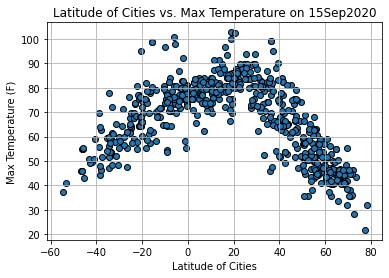

In [23]:
#create scatter plot latitude vs max temp
plt.scatter(city_weather_data_df['Latitude'], city_weather_data_df['Temp Max'], marker="o", edgecolors="black")
plt.title("Latitude of Cities vs. Max Temperature on 15Sep2020")
plt.xlabel("Latitude of Cities")
plt.ylabel("Max Temperature (F)")
plt.grid()
plt.savefig("Images/scatter_lat_vs_maxtemp.png")
plt.show()

## Latitude vs. Humidity Plot

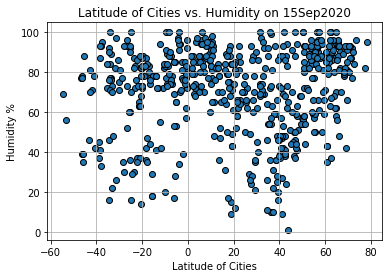

In [24]:
#create scatter plot latitude vs humidity
plt.scatter(city_weather_data_df['Latitude'], city_weather_data_df['Humidity (%)'], marker="o", edgecolors="black")
plt.title("Latitude of Cities vs. Humidity on 15Sep2020")
plt.xlabel("Latitude of Cities")
plt.ylabel("Humidity %")
plt.grid()
plt.savefig("Images/scatter_lat_vs_humidity.png")
plt.show()

## Latitude vs. Cloudiness Plot

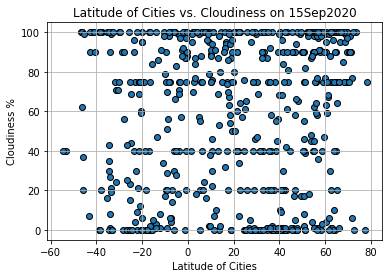

In [25]:
#create scatter plot latitude vs cloudiness
plt.scatter(city_weather_data_df['Latitude'], city_weather_data_df['Cloudiness (%)'], marker="o", edgecolors="black")
plt.title("Latitude of Cities vs. Cloudiness on 15Sep2020")
plt.xlabel("Latitude of Cities")
plt.ylabel("Cloudiness %")
plt.grid()
plt.savefig("Images/scatter_lat_vs_cloudiness.png")
plt.show()

## Latitude vs. Wind Speed Plot

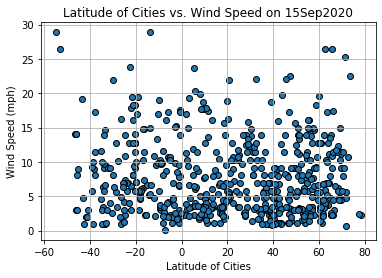

In [26]:
#create scatter plot latitude vs wind speed
plt.scatter(city_weather_data_df['Latitude'], city_weather_data_df['Windspeed (mph)'], marker="o", edgecolors="black")
plt.title("Latitude of Cities vs. Wind Speed on 15Sep2020")
plt.xlabel("Latitude of Cities")
plt.ylabel("Wind Speed (mph)")
plt.grid()
plt.savefig("Images/scatter_lat_vs_windspeed.png")
plt.show()

## Linear Regression

In [27]:
north_weather_df = city_weather_data_df.loc[city_weather_data_df["Latitude"] >= 0]
north_weather_df

,City,Latitude,Longitude,Date,Temperature (F),Temp Max,Humidity (%),Cloudiness (%),Windspeed (mph)
0,Los Llanos de Aridane,28.66,-17.92,1600202506,75.07,75.20,78,20,11.41
1,Tuktoyaktuk,69.45,-133.04,1600202506,32.00,32.00,80,90,11.41
2,Maguling,6.09,124.40,1600202506,77.41,77.41,85,100,4.03
4,Jamestown,42.10,-79.24,1600202506,64.08,66.00,48,1,3.36
5,Saint Paul Harbor,57.79,-152.41,1600202506,53.80,53.80,94,91,14.58
...,...,...,...,...,...,...,...,...,...
578,Øksfjord,70.24,22.35,1600202575,45.14,46.40,93,75,5.82
579,Helong,42.54,129.00,1600202575,53.51,53.51,86,100,2.59
580,Goderich,43.75,-81.72,1600202391,68.00,71.01,65,81,19.69
582,Bogorodskoye,56.55,37.88,1600202576,44.51,44.51,87,0,7.45


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

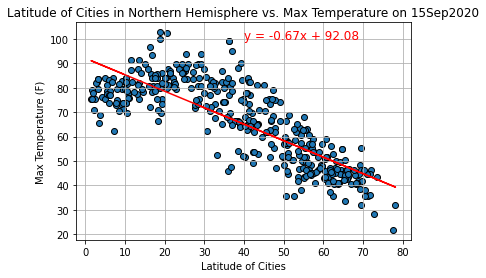

The r-squared is: 0.6678868584842982


In [28]:
#locate all data >=0 latitude in new df
north_weather_df = city_weather_data_df.loc[city_weather_data_df["Latitude"] >= 0]
north_weather_df
x_values = north_weather_df['Latitude']
y_values = north_weather_df['Temp Max']
#create scatter plot northern latitudes vs max temp
plt.scatter(x_values, y_values, marker="o", edgecolors="black")
plt.title("Latitude of Cities in Northern Hemisphere vs. Max Temperature on 15Sep2020")
plt.xlabel("Latitude of Cities")
plt.ylabel("Max Temperature (F)")
plt.grid()
#regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
r_squared = rvalue**2
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(40,100),fontsize=12,color="red")

#save & show
plt.savefig("Images/scatter_NORTH_lat_vs_maxtemp_regression.png")
plt.show()
print(f"The r-squared is: {r_squared}")

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

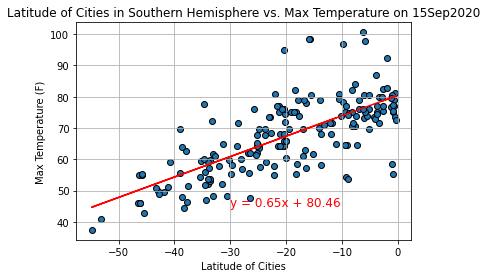

The r-squared is: 0.513890117180917


In [29]:
south_weather_df = city_weather_data_df.loc[city_weather_data_df["Latitude"] < 0]
south_weather_df
x_values = south_weather_df['Latitude']
y_values = south_weather_df['Temp Max']
#create scatter plot southern latitudes vs max temp
plt.scatter(south_weather_df['Latitude'], south_weather_df['Temp Max'], marker="o", edgecolors="black")
plt.title("Latitude of Cities in Southern Hemisphere vs. Max Temperature on 15Sep2020")
plt.xlabel("Latitude of Cities")
plt.ylabel("Max Temperature (F)")
plt.grid()

#regression 
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
r_squared = rvalue**2
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-30,45),fontsize=12,color="red")

#save & show
plt.savefig("Images/scatter_SOUTH_lat_vs_maxtemp_regression.png")
plt.show()
print(f"The r-squared is: {r_squared}")

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

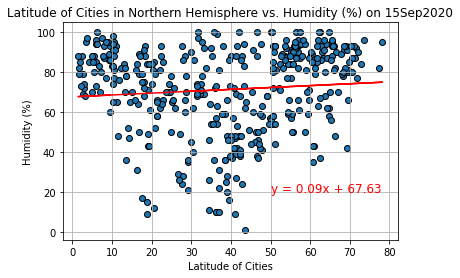

The r-squared is: 0.0075764741470975335


In [30]:
#set x & y values
x_values = north_weather_df['Latitude']
y_values = north_weather_df['Humidity (%)']
#create scatter plot northern latitudes vs max temp
plt.scatter(x_values, y_values, marker="o", edgecolors="black")
plt.title("Latitude of Cities in Northern Hemisphere vs. Humidity (%) on 15Sep2020")
plt.xlabel("Latitude of Cities")
plt.ylabel("Humidity (%)")
plt.grid()
#regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
r_squared = rvalue**2
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(50,20),fontsize=12,color="red")

#save & show
plt.savefig("Images/scatter_NORTH_lat_vs_humidity_regression.png")
plt.show()
print(f"The r-squared is: {r_squared}")

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

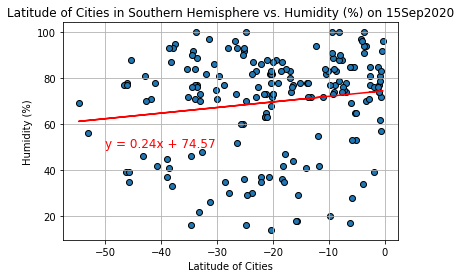

The r-squared is: 0.022512254656274867


In [31]:
#set x & y values
x_values = south_weather_df['Latitude']
y_values = south_weather_df['Humidity (%)']
#create scatter plot southern latitudes vs max temp
plt.scatter(x_values, y_values, marker="o", edgecolors="black")
plt.title("Latitude of Cities in Southern Hemisphere vs. Humidity (%) on 15Sep2020")
plt.xlabel("Latitude of Cities")
plt.ylabel("Humidity (%)")
plt.grid()

#regression 
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
r_squared = rvalue**2
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50, 50),fontsize=12,color="red")

#save & show
plt.savefig("Images/scatter_SOUTH_lat_vs_humidity_regression.png")
plt.show()
print(f"The r-squared is: {r_squared}")

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

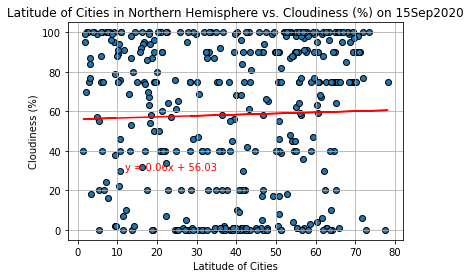

The r-squared is: 0.0009238298217280005


In [32]:
#set x & y values
x_values = north_weather_df['Latitude']
y_values = north_weather_df['Cloudiness (%)']
#create scatter plot northern latitudes vs max temp
plt.scatter(x_values, y_values, marker="o", edgecolors="black")
plt.title("Latitude of Cities in Northern Hemisphere vs. Cloudiness (%) on 15Sep2020")
plt.xlabel("Latitude of Cities")
plt.ylabel("Cloudiness (%)")
plt.grid()
#regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
r_squared = rvalue**2
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(12,30),fontsize=10,color="red")

#save & show
plt.savefig("Images/scatter_NORTH_lat_vs_cloudiness_regression.png")
plt.show()
print(f"The r-squared is: {r_squared}")

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

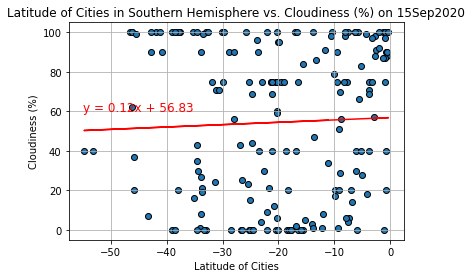

The r-squared is: 0.001708149897415676


In [33]:
#set x & y values
x_values = south_weather_df['Latitude']
y_values = south_weather_df['Cloudiness (%)']
#create scatter plot southern latitudes vs max temp
plt.scatter(x_values, y_values, marker="o", edgecolors="black")
plt.title("Latitude of Cities in Southern Hemisphere vs. Cloudiness (%) on 15Sep2020")
plt.xlabel("Latitude of Cities")
plt.ylabel("Cloudiness (%)")
plt.grid()

#regression 
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
r_squared = rvalue**2
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-55, 60),fontsize=12,color="red")

#save & show
plt.savefig("Images/scatter_SOUTH_lat_vs_cloudiness_regression.png")
plt.show()
print(f"The r-squared is: {r_squared}")

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

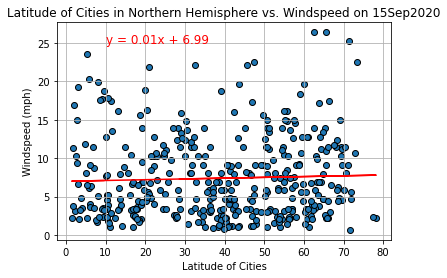

The r-squared is: 0.001528791371343609


In [34]:
#set x & y values
x_values = north_weather_df['Latitude']
y_values = north_weather_df['Windspeed (mph)']
#create scatter plot northern latitudes vs max temp
plt.scatter(x_values, y_values, marker="o", edgecolors="black")
plt.title("Latitude of Cities in Northern Hemisphere vs. Windspeed on 15Sep2020")
plt.xlabel("Latitude of Cities")
plt.ylabel("Windspeed (mph)")
plt.grid()
#regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
r_squared = rvalue**2
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(10,25),fontsize=12,color="red")

#save & show
plt.savefig("Images/scatter_NORTH_lat_vs_windspeed_regression.png")
plt.show()
print(f"The r-squared is: {r_squared}")

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

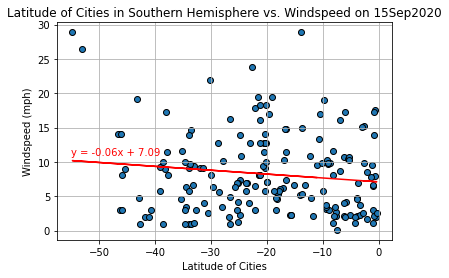

The r-squared is: 0.01681409953563703


In [35]:
#set x & y values
x_values = south_weather_df['Latitude']
y_values = south_weather_df['Windspeed (mph)']
#create scatter plot southern latitudes vs max temp
plt.scatter(x_values, y_values, marker="o", edgecolors="black")
plt.title("Latitude of Cities in Southern Hemisphere vs. Windspeed on 15Sep2020")
plt.xlabel("Latitude of Cities")
plt.ylabel("Windspeed (mph)")
plt.grid()

#regression 
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
r_squared = rvalue**2
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-55, 11),fontsize=10,color="red")

#save & show
plt.savefig("Images/scatter_SOUTH_lat_vs_windspeed_regression.png")
plt.show()
print(f"The r-squared is: {r_squared}")